In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
driver = pd.read_csv('/Users/Pawan Kumar/Downloads/driver-data.csv')

In [75]:
driver.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [76]:
driver.isna().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [63]:
driver.shape

(4000, 3)

In [124]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=8380).fit(driver.drop('id', axis =1))
driver['Cluster']=kmeans.labels_

In [125]:
driver.head()

,id,mean_dist_day,mean_over_speed_perc,Cluster
0,3423311935,71.24,28,3
1,3423313212,52.53,25,3
2,3423313724,64.54,27,3
3,3423311373,55.69,22,3
4,3423310999,54.58,25,3


In [126]:
df1 = driver.groupby('Cluster').mean_dist_day.mean().reset_index()

In [127]:
df2 = driver.groupby('Cluster').mean_over_speed_perc.mean().reset_index()
final_df = df2.merge(df1).rename(columns ={'mean_over_speed_perc': 'Mean speed over over 5mph', 'mean_dist_day': 'Mean distance'})

In [128]:
final_df

,Cluster,Mean speed over over 5mph,Mean distance
0,0,5.214414,49.984285
1,1,10.520115,180.343118
2,2,70.288462,177.835096
3,3,32.428235,50.461271


C:\Users\Pawan Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


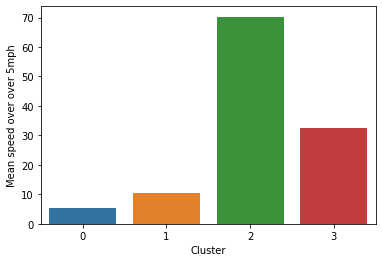

In [129]:
sns.barplot(x = 'Cluster', y ='Mean speed over over 5mph', data =final_df)
plt.subplot()
plt.show()

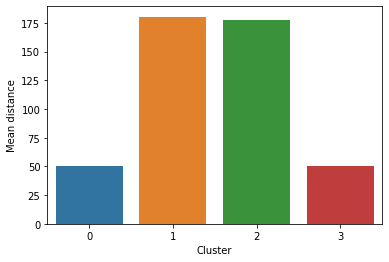

In [130]:
fig = plt.figure()
sns.barplot(x = 'Cluster', y ='Mean distance', data =final_df)

In [137]:
scatt = driver[(driver.Cluster==1)]

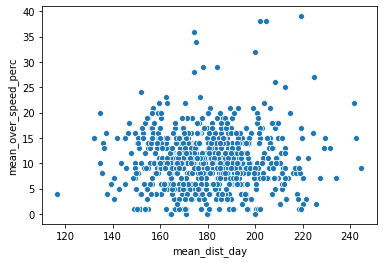

In [138]:
sns.scatterplot(x=scatt.mean_dist_day, y = scatt.mean_over_speed_perc)

# Find how many cluster will be fruitfull

In [19]:
sse= {}
def kclus(df):
    for k in range(1,10):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
        driver['Cluster']=kmeans.labels_
        sse[k] = kmeans.inertia_
    return sse

In [20]:
kclus(driver)

{1: 5345517626.129628,
 2: 1345507735.567577,
 3: 604776497.3713441,
 4: 345509266.6279938,
 5: 225519080.37434366,
 6: 160351699.18792403,
 7: 121035511.0231691,
 8: 95540822.1932318,
 9: 78046838.07994759}

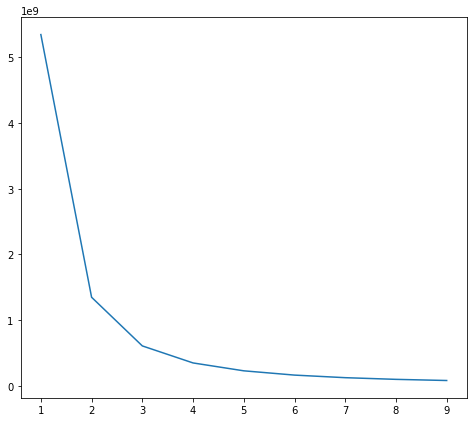

In [34]:
plt.figure(figsize=(8,7))
plt.plot(list(sse.keys()), list(sse.values()))

In [ ]:
# So, as we can see that 4 clusters is good to find the situation.

'<built-in method keys of dict object at 0x000001F8BF319138>'